In [63]:
import pandas as pd
import numpy as np
from verstack.stratified_continuous_split import scsplit # pip install verstack
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [65]:
df_train = pd.read_csv('../../data/train_cleanV2.csv')
df_test = pd.read_csv('../../data/evaluation_cleanV2.csv')

In [66]:
df_train.head(3)

,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,0,0.009504,9.405109e-06,0.000279,NaN,NaN,NaN,smh give
1,0,0,0.000043,4.356590e-07,0.000046,NaN,NaN,NaN,us human be think miss boat georg
2,0,0,0.000450,1.430841e-05,0.000529,NaN,NaN,NaN,old dirti trick trump like know fauci would sa...


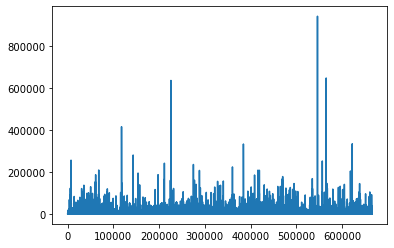

In [67]:
plt.plot(df_train['retweet_count'])

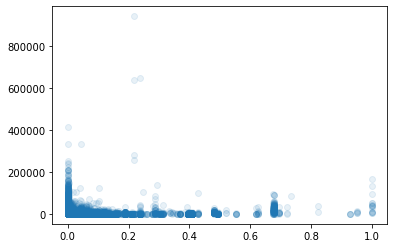

In [68]:
plt.scatter(df_train['user_followers_count'], df_train['retweet_count'], alpha=0.1)

## Simple linear regression

In [69]:
columns = ['retweet_count', 'user_friends_count']
df_train_cont = df_train[columns]

X_train, X_test, y_train, y_test = scsplit(df_train_cont['user_friends_count'], 
                                           df_train_cont['retweet_count'], 
                                           stratify=df_train_cont['retweet_count'], 
                                           train_size=0.7, 
                                           test_size=0.3)

In [70]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [71]:
model = LinearRegression()

In [72]:
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)

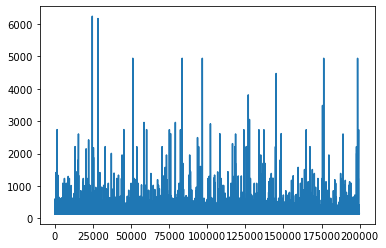

In [74]:
plt.plot(y_pred)

In [75]:
print(y_pred.mean())
print(y_test.mean())

147.85066611757466
147.25110396827782


In [76]:
#model parameters
print('a: ', model.coef_)
print('b', model.intercept_)

a:  [17978.21005025]
b 136.65660212363625


In [77]:
y_test

208538     0
488785     0
23742      0
324037     2
269253     3
          ..
832        1
459490     0
472741     0
166908     1
109751    41
Name: retweet_count, Length: 199734, dtype: int64

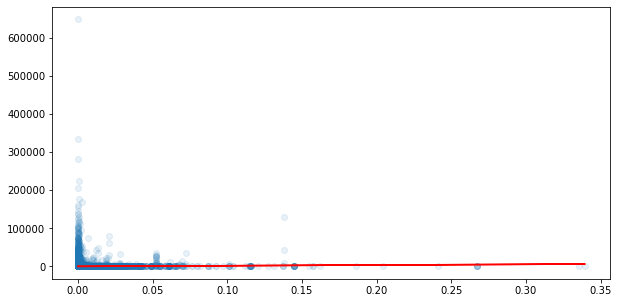

In [78]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['user_friends_count'], y_test, alpha=0.1)
plt.plot(X_test['user_friends_count'], model.intercept_ + model.coef_ * X_test['user_friends_count'], c='r')

In [79]:
### MAE
MAE = np.sum(np.abs(y_test - y_pred))/len(y_test)
print(MAE)

270.2301463218638


## Multivariate linear regression

In [92]:
columns = ['retweet_count', 'user_verified', 'user_statuses_count', 'user_followers_count', 'user_friends_count']
df_train_cont = df_train[columns]

X_train, X_test, y_train, y_test = scsplit(df_train_cont.drop(columns=['retweet_count']), 
                                           df_train_cont['retweet_count'], 
                                           stratify=df_train_cont['retweet_count'], 
                                           train_size=0.7, 
                                           test_size=0.3)
#Train
train_mean = X_train.mean()
X_train = pd.DataFrame(X_train)
X_train = X_train.subtract(train_mean)

# Test 
test_mean = X_test.mean()
X_test = pd.DataFrame(X_test)
X_test = X_test.subtract(test_mean)

In [93]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred = model.predict(X_test) 

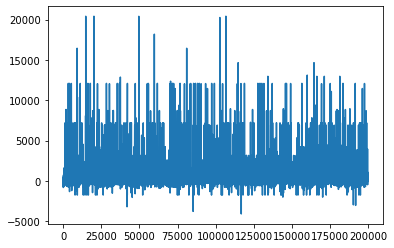

In [95]:
plt.plot(y_pred)

In [96]:
print(y_pred.mean())
print(y_test.mean())

146.5983482210858
150.22849890354172


In [98]:
### MAE
MAE = np.sum(np.abs(y_test - y_pred))/len(y_test)
print(MAE)

259.3285182972515


## Excluding outliers

In [152]:
def split_clean(row):
    print(row)
    print(np.isnan(row))
    if not np.isnan(row):
        print(row)
        return len(row.split(' '))
    else:
        return 0

In [153]:
df_train['user_mentions_number'] = df_train['user_mentions'].apply(lambda x: split_clean(x))

nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
nan
True
AberdeenCC aberdeenCF GCP_JustGoRide


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [103]:
'a, B, c, D'.split(',')

['a', ' B', ' c', ' D']

In [129]:
df_train['user_mentions'].isna()

0          True
1          True
2          True
3          True
4          True
          ...  
665772     True
665773    False
665774     True
665775     True
665776     True
Name: user_mentions, Length: 665777, dtype: bool

In [135]:
df_train['user_mentions_number'].value_counts()

0    665777
Name: user_mentions_number, dtype: int64

In [157]:
num_user_mentions = pd.DataFrame(
    df_train[df_train['user_mentions'].notnull()]['user_mentions'].apply(lambda x: len(x.split(' '))))

In [161]:
pd.merge(df_train, num_user_mentions, how='left', on=[''])

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [174]:
df_train.join(num_user_mentions, how='outer')

ValueError: columns overlap but no suffix specified: Index(['user_mentions'], dtype='object')

In [166]:
df_train.head(3)

,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text,user_mentions_number
0,0,0,0.009504,9.405109e-06,0.000279,NaN,NaN,NaN,smh give,0
1,0,0,0.000043,4.356590e-07,0.000046,NaN,NaN,NaN,us human be think miss boat georg,0
2,0,0,0.000450,1.430841e-05,0.000529,NaN,NaN,NaN,old dirti trick trump like know fauci would sa...,0


In [167]:
num_user_mentions.head(3)

,user_mentions
25,3
26,2
64,4


In [170]:
df3 = pd.merge(df_train, num_user_mentions, left_index=True, right_index=True)


MergeError: Must pass right_on or right_index=True

In [169]:
df3

,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions_x,urls,hashtags,text,user_mentions_number,user_mentions_y
25,1,0,0.009567,0.000018,0.001135,AberdeenCC aberdeenCF GCP_JustGoRide,"twitter.com/i/web/status/1…,",SpaceForDistancing spacefordistancing,look like good opportun work creat may interest,0,3
26,1,0,0.010021,0.000029,0.000338,OuestFrance ouestfrance,"ouest-france.fr/sante/virus/co…, https://t.co/...",Coronavirus Virus coronavirus virus,coronaviru la quasi-totalit de marin du charl ...,0,2
64,4,0,0.000565,0.000017,0.000147,hope2shine justempower BeaChristofaro gubasso,"twitter.com/i/web/status/1…, https://t.co/b4o3...",NaN,social distanc inform settlement quit crowd lo...,0,4
68,3,0,0.001200,0.000013,0.000233,MoorePresence,"twitter.com/i/web/status/1…, https://t.co/KHjS...",ThePowerOfPresence thepowerofpresence,morn 264 peopl sign time covid-19 w there' sti...,0,1
76,13,0,0.012193,0.001102,0.000008,LemusteleSUR,"twitter.com/i/web/status/1…, https://t.co/IiO9...",NaN,brazil | 346 death coronaviru 24h total alread...,0,2
...,...,...,...,...,...,...,...,...,...,...,...
665711,1,1,0.007918,0.000528,0.004101,megindurti ChrisTrani RSSIChicago,"twitter.com/i/web/status/1…, https://t.co/jHKx...",NaN,chicago comedian vik pandya bring laugh rais m...,0,3
665716,10,0,0.009746,0.000143,0.004147,JoeySalads,"twitter.com/i/web/status/1…, https://t.co/d3NO...",NaN,walkout term use mass number worker walk emplo...,0,1
665734,11,1,0.002406,0.000096,0.000629,avmarbach WithoutViolence NSVRC,"twitter.com/i/web/status/1…, https://t.co/7ZyC...",COVID19 covid19 askabt,do help peopl experienc intim partner violenc ...,0,3
665761,3,1,0.003746,0.000162,0.000219,VanathiBJP narendramodi PMOIndia JPNadda blsan...,"twitter.com/i/web/status/1…, https://t.co/8G8B...",NaN,rss train leader lie get expos smt vanathi cen...,0,6
